In [1]:
import pandas as pd
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("linear_regression_01.csv")
df.head(2)

,x,y
0,1,0
1,3,1


In [3]:
model = ols("y ~ x", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0848
Time:                        09:18:57   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.2

In [4]:
iris = pd.read_excel("iris_xlsx.xlsx")
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [18]:
from statsmodels.formula.api import ols

In [20]:
iris = iris.rename(columns = {"Sepal.Length" : "SL", "Sepal.Width" : "SW"})

In [23]:
model = ols("SW ~ SL", data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SW   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.152
Time:                        09:39:00   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4189      0.254     13.484      0.0

In [27]:
model.f_pvalue

0.15189826071144713

In [28]:
model.params

Intercept    3.418947
SL          -0.061885
dtype: float64

In [29]:
iris = iris.rename(columns = {"Petal.Length" : "PL", "Petal.Width" : "PW"})

In [34]:
model = ols("PL ~ PW", data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PL   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.68e-86
Time:                        10:01:34   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0836      0.073     14.850      0.0

In [35]:
model.f_pvalue

4.675003907327411e-86

In [36]:
model.params

Intercept    1.083558
PW           2.229940
dtype: float64

In [37]:
model.predict(iris)

0      1.529546
1      1.529546
2      1.529546
3      1.529546
4      1.529546
         ...   
145    6.212421
146    5.320445
147    5.543439
148    6.212421
149    5.097451
Length: 150, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
iris_train, iris_test = train_test_split(iris, train_size = 0.7, random_state = 123)

In [62]:
model = ols("PL ~ PW", data = iris_train).fit()

In [63]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PL   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1169.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.83e-58
Time:                        10:24:46   Log-Likelihood:                -73.096
No. Observations:                 105   AIC:                             150.2
Df Residuals:                     103   BIC:                             155.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0973      0.093     11.760      0.0

In [64]:
model.params.round(1)

Intercept    1.1
PW           2.2
dtype: float64

In [69]:
model.params[1].round(1)

2.2

In [65]:
iris_test_pr = model.predict(iris_test)

In [66]:
RMSE = (sum((iris_test["PL"] - iris_test_pr) ** 2) / len(iris_test)) ** 0.5
RMSE

0.4500505408421368

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(y_true = iris_test["PL"], y_pred = iris_test_pr) ** 0.5

0.4500505408421368

In [67]:
1.1 + 2.2 * 3.12

7.964

In [72]:
model.predict(pd.DataFrame({"PW" : [3.12]}))

0    8.03368
dtype: float64

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
model_sk = LinearRegression().fit(X = iris[["PL"]],
                                 y = iris[["PW"]])

In [117]:
model_sk.coef_

array([[0.41575542]])

In [118]:
model_sk.intercept_

array([-0.36307552])

In [119]:
model_sk.predict(iris.loc[:3, ["PL"]])

array([[0.21898206],
       [0.21898206],
       [0.17740652],
       [0.2605576 ]])

In [120]:
bike  = pd.read_csv("bike.csv")
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [134]:
from sklearn.model_selection import train_test_split

In [159]:
bike["datetime"] = pd.to_datetime(bike["datetime"])

bike["wday"] = bike["datetime"].dt.weekday

bike.head()

import numpy as np
bike["is_wend"] = np.where(bike["wday"].isin([5, 6]), 1, 0)

bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wday,is_wend,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,0,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,0,20,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,0,21,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,0,22,19


In [160]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 246)

bike.shape[0]

10886

In [161]:
model = ols("registered ~ is_wend + weather + temp + windspeed", data = bike_train).fit()
model.params.round(2)

Intercept    55.76
is_wend     -37.09
weather     -24.63
temp          6.12
windspeed     1.74
dtype: float64

In [162]:
model.rsquared.round(2)

0.13

In [163]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     294.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          6.79e-236
Time:                        13:14:39   Log-Likelihood:                -48559.
No. Observations:                7620   AIC:                         9.713e+04
Df Residuals:                    7615   BIC:                         9.716e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.7623      6.627      8.414      0.000      42.771      68.754
is_wend      -37.0925      3.600    -10.303      0.000     -44.150     -30.035
weather      -24.6295      2.572     -9.576      0.000     -29.671     -19.588
temp           6.1206      0.208     29.356      0.000       5.712       6.529
windspeed      1.7427      0.198      8.793      0.000       1.354       2.131
==============================================================================
Omnibus:                     1955.112   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4691.402
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                       5.577   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["hour"] = bike["datetime"].dt.hour
bike_agg = bike.groupby("hour")["registered"].mean()
bike_agg.head(2)

hour
0    44.826374
1    27.345815
Name: registered, dtype: float64

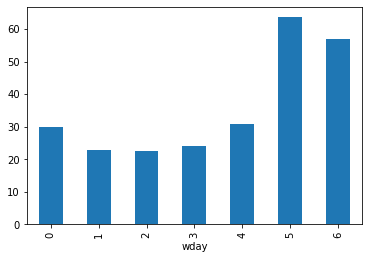

In [173]:
bike_agg.plot(kind = "bar") ;

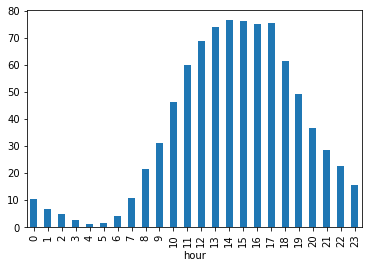

In [174]:
bike["hour"] = bike["datetime"].dt.hour
bike_agg = bike.groupby("hour")["casual"].mean()
bike_agg.plot(kind = "bar") ;

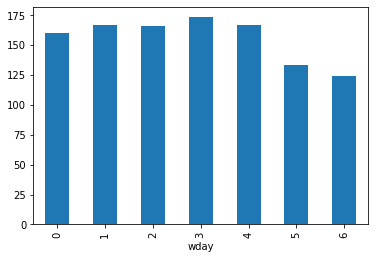

In [175]:
bike["wday"] = bike["datetime"].dt.weekday
bike_agg = bike.groupby("wday")["registered"].mean()
bike_agg.plot(kind = "bar");

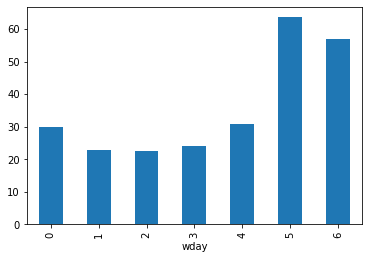

In [176]:
bike["wday"] = bike["datetime"].dt.weekday
bike_agg = bike.groupby("wday")["casual"].mean()
bike_agg.plot(kind = "bar");

In [177]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [179]:
dia_dum1 = pd.get_dummies(data = dia, columns=["cut"])
dia_dum1.head(2)

,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0


In [182]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [180]:
dia_dum2 = pd.get_dummies(data = dia, columns=["cut"], drop_first = True)
dia_dum2.head(2)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0


In [183]:
"price ~ " + " + ".join(dia.columns[:4]) 

'price ~ carat + cut + color + clarity'

In [201]:
dia_dum = pd.get_dummies(data = dia, columns=["cut"], drop_first = True)


dia_dum_train, dia_dum_test = train_test_split(dia_dum, train_size = 0.8, random_state = 234)
model = ols("price ~ color + carat", data = dia_dum_train).fit()
model.rsquared.round(2)

0.86

In [202]:
dia_dum.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0


In [203]:
dia_dum_train.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
21619,1.12,E,VS2,61.9,56.0,9710,6.65,6.68,4.13,0,1,0,0


In [204]:
dia_dum_test.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
9832,1.01,D,SI2,60.3,57.0,4672,6.56,6.51,3.94,0,0,1,0


In [212]:
model_pred = model.predict(dia_dum_test)

In [207]:
model_pred

9832      6027.079294
7384       434.140665
27825      618.988066
42669     1322.036239
18151     8203.351149
             ...     
24097     9878.120868
14816     5846.998703
27673     9882.887679
3071      4332.005924
27442    13926.194199
Length: 10788, dtype: float64

In [213]:
dia_dum_test["price"]

9832      4672
7384       579
27825      650
42669     1334
18151     7356
         ...  
24097    12247
14816     5967
27673    18691
3071      3312
27442    18069
Name: price, Length: 10788, dtype: int64

In [219]:
MAE = sum(abs(dia_dum_test["price"] - model_pred)) / len(model_pred)
round(MAE, 3)

979.735

In [225]:
from statsmodels.api import Logitogit

In [226]:
df = pd.read_csv("logistic_regression_01.csv")
df.head(2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3


In [227]:
model = Logit(endog = df[["admit"]], exog = df.drop("admit", axis = 1)).fit()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [228]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                 0.06176
Time:                        15:43:28   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
rank          -0.6695      0.121     -5.527      0.000      -0.907      -0.432
==============================================================================
"""

In [229]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.062     
Dependent Variable: admit            AIC:              475.0973  
Date:               2021-10-29 15:43 BIC:              487.0717  
No. Observations:   400              Log-Likelihood:   -234.55   
Df Model:           2                LL-Null:          -249.99   
Df Residuals:       397              LLR p-value:      1.9709e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
gre        0.0015     0.0010    1.4204   0.1555   -0.0006    0.0035
gpa       -0.0042     0.2011   -0.0207   0.9835   -0.3984    0.3900
rank      -0.6695     0.1211   -5.5266   0.0000   -0.9070   -0.4321
=================================================================

"""

In [230]:
import numpy as np

In [231]:
model.params

gre     0.001477
gpa    -0.004167
rank   -0.669538
dtype: float64

In [232]:
np.exp(model.params)

gre     1.001478
gpa     0.995842
rank    0.511945
dtype: float64

In [255]:
df = pd.read_csv("classification_data_01.csv")
df.tail(5)

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [257]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 567)

In [258]:
model = Logit(endog = df_train[["Class"]], exog = df_train.drop("Class", axis = 1)).fit()

Optimization terminated successfully.
         Current function value: 0.102186
         Iterations 11


In [259]:
model.params

Variance   -2.668095
Skewness   -1.652675
Curtosis   -1.772015
Entropy    -0.846140
dtype: float64

In [260]:
np.exp(model.params).round(2)

Variance    0.07
Skewness    0.19
Curtosis    0.17
Entropy     0.43
dtype: float64

In [262]:
pred = model.predict(df_test.drop("Class", axis = 1))

In [263]:
pred.min()

8.466990097583288e-11

In [264]:
pred.max()

0.9999912797481564

In [265]:
pred_class = (pred > 0.5) + 0
pred_class[:4]

340     0
21      0
1011    1
1330    1
dtype: int64

In [266]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [267]:
accuracy_score(y_true=df_test["Class"], y_pred=pred_class)

0.9660194174757282

In [268]:
pd.crosstab(df_test["Class"], pred_class)

col_0,0,1
Class,,
0,235,0
1,14,163


In [269]:
from sklearn.metrics import roc_auc_score

In [270]:
roc_auc_score(y_true=df_test["Class"], y_score=pred)

0.9990143046039187